---
# 투자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import timedelta

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [ ]:
벤치마크/2012/16.34/16.39/1.07/1.44
벤치마크/2013/63.42/63.64/3.11/4.96
벤치마크/2014/33.69/33.69/1.49/2.14
벤치마크/2015/24.73/24.81/1.19/1.69
벤치마크/2016/16.59/16.79/1/1.42
벤치마크/2017/-11.88/-12.01/-0.33/-0.45
벤치마크/2018/6.74/9.11/0.49/0.68

동등비중/2012/전략1/4.64/4.66/0.34/0.45
동등비중/2012/전략2/21.45/21.52/2.99/5.46 
동등비중/2012/전략3/2.71/2.72/0.32/0.46
동등비중/2012/전략4/6.41/6.43/0.82/1.17
동등비중/2012/전략5/22.22/22.28/2.26/3.46 # 최고

동등비중/2013/전략1/56.92/57.11/2.26/3.56
동등비중/2013/전략2/60.99/61.2/4.65/10.48
동등비중/2013/전략3/10.41/10.44/0.92/1.33
동등비중/2013/전략4/40.43/40.56/2.73/4.77
동등비중/2013/전략5/64.71/64.94/3.81/7.31 # 최고

동등비중/2014/전략1/52.1/52.1/1.81/2.66
동등비중/2014/전략2/43.13/43.13/3.26/6.73
동등비중/2014/전략3/15.32/15.32/1.45/2.14
동등비중/2014/전략4/29.6/29.5/2.01/3.39
동등비중/2014/전략5/47.59/47.59/2.81/4.83 # 최고

동등비중/2015/전략1/-7.42/-7.44/-0.24/-0.34
동등비중/2015/전략2/11.88/11.91/1.46/2.52 # 최고
동등비중/2015/전략3/12.9/12.94/1.15/1.77
동등비중/2015/전략4/1.38/1.39/0.18/0.27
동등비중/2015/전략5/2.41/2.41/0.28/0.43

동등비중/2016/전략1/30.85/31.24/1.42/2.21
동등비중/2016/전략2/27.43/27.77/2.14/4.14
동등비중/2016/전략3/10.93/11.05/1.27/2.21
동등비중/2016/전략4/22.38/22.66/1.49/2.5
동등비중/2016/전략5/32.84/33.26/1.99/3.24 # 최고

동등비중/2017/전략1/-0.53/-0.54/0.2/0.32
동등비중/2017/전략2/81.23/82.43/2.19/5.99
동등비중/2017/전략3/-25.4/-25.65/-1.53/-1.95
동등비중/2017/전략4/67.56/68.52/2/5.31
동등비중/2017/전략5/90.32/91.69/2.34/5.89 # 최고

동등비중/2017_전체/전략1/-11.88/-12.01/-0.33/-0.45
동등비중/2017_전체/전략2/22.64/22.92/1.64/3.35
동등비중/2017_전체/전략3/-14.8/-14.95/-1.37/-1.81
동등비중/2017_전체/전략4/22.14/22.41/1.52/2.91
동등비중/2017_전체/전략5/25.74/26.06/1.68/3.12 # 최고

동등비중/2018/전략1/18.81/25.91/0.94/1.46
동등비중/2018/전략2/32.31/45.4/2.73/6.49 # 최고
동등비중/2018/전략3/-3.17/-4.22/-0.13/-0.22
동등비중/2018/전략4/16.24/22.29/1.27/2.26
동등비중/2018/전략5/29.11/40.72/2.05/3.79

In [ ]:
[코스피]
2013/-0.5200426855846026
2014/2.4623741202220883
2015/-1.6071384554709328
2016/9.457987302198559
2017/12.841463245844295
2018/-12.416944880858856
2019/1.355452247864661

[코스닥]
2013/-2.236583208476991
2014/18.469075544547237
2015/5.8671546991064666
2016/-10.338936425892958
2017/38.59383949595877
2018/-15.958746254897443
2019/-9.090538944911158


---
# 비중계산

## 1. 마코위츠 데이터 로드

In [1578]:
df=pd.read_excel('./datasets/예상회생기업.xlsx', index_col=0)
df["거래소코드"] = df["거래소코드"].map(padding)
df = df[df["회계년도"]==2014]
df = df[["거래소코드"]]
df

,거래소코드
49,115480
50,067990
51,079810
52,061970
53,126880
54,098660
55,096870
56,000210
57,046970
58,003560


In [1579]:
df=pd.DataFrame(df['거래소코드'].unique())
df.rename(columns={0:'거래소코드'}, inplace=True)
df

,거래소코드
0,115480
1,067990
2,079810
3,061970
4,126880
5,098660
6,096870
7,000210
8,046970
9,003560


## a. volinger

> # 날짜 변경(2012년도데이터면 20120401~20130331)
> 비중계산은 4월부터 3월(아래서 투자할 때는 +1년의 1월부터 +2년의 3월)

In [1580]:
n=20
sigma = 2
df_marko=[]

for i in df.index:
    df_market = stock.get_market_ohlcv("20140401", "20150331", df.loc[i,"거래소코드"])
    df_market["거래소코드"] = df.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_marko.append(df_market)

In [1581]:
df_marko = pd.concat(df_marko)
df_marko['PB'] = (df_marko['종가'] - df_marko['lb']) / (df_marko['ub'] - df_marko['lb'])
df_marko.reset_index(drop=False, inplace=True)
df_marko=df_marko.pivot(index='날짜', columns='거래소코드', values='종가')
df_marko

거래소코드,000210,003560,003920,004140,006360,008970,009620,010620,013580,031820,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
날짜,,,,,,,,,,,,,,,,,,,,
2014-04-01,86200,2710,862000,2415,33567,1405,16100,154000,14450,1410,6640,1920,4085,2220,5820,2100,2445,2377,7040,7920
2014-04-02,87100,2740,861000,2415,33844,1405,16250,154500,14200,1395,6800,2000,4065,2220,5690,2160,2470,2394,7000,7950
2014-04-03,86100,2700,860000,2400,34214,1420,16200,153500,14250,1405,6760,1975,4000,2220,5650,2175,2440,2407,7040,7940
2014-04-04,85000,2790,872000,2390,33983,1420,16350,153500,14500,1545,6510,2025,4050,2255,5360,2170,2540,2421,7230,8000
2014-04-07,84000,2705,867000,2400,33243,1390,16350,158500,14200,1700,6260,2100,4025,2275,5360,2180,2555,2387,7310,7940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-25,63700,3080,729000,3060,32400,1210,22400,72700,12300,1535,7180,1450,4145,1685,4705,2165,2380,3200,8530,5860
2015-03-26,63200,3320,743000,3515,30850,1235,22550,74400,12150,1585,6990,1395,4105,1665,4700,2165,2430,3130,8570,5820
2015-03-27,61400,3045,743000,3450,29150,1260,22400,73800,12150,1585,7000,1440,4090,1675,4625,2160,2395,3040,8420,5830


## 2. pct change(종목별 일별수익률)

In [1582]:
daily_ret = df_marko.pct_change()
daily_ret

거래소코드,000210,003560,003920,004140,006360,008970,009620,010620,013580,031820,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
날짜,,,,,,,,,,,,,,,,,,,,
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,0.010441,0.011070,-0.001160,0.000000,0.008252,0.000000,0.009317,0.003247,-0.017301,-0.010638,0.024096,0.041667,-0.004896,0.000000,-0.022337,0.028571,0.010225,0.007152,-0.005682,0.003788
2014-04-03,-0.011481,-0.014599,-0.001161,-0.006211,0.010933,0.010676,-0.003077,-0.006472,0.003521,0.007168,-0.005882,-0.012500,-0.015990,0.000000,-0.007030,0.006944,-0.012146,0.005430,0.005714,-0.001258
2014-04-04,-0.012776,0.033333,0.013953,-0.004167,-0.006752,0.000000,0.009259,0.000000,0.017544,0.099644,-0.036982,0.025316,0.012500,0.015766,-0.051327,-0.002299,0.040984,0.005816,0.026989,0.007557
2014-04-07,-0.011765,-0.030466,-0.005734,0.004184,-0.021776,-0.021127,0.000000,0.032573,-0.020690,0.100324,-0.038402,0.037037,-0.006173,0.008869,0.000000,0.004608,0.005906,-0.014044,0.011065,-0.007500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-25,-0.025994,-0.009646,0.028209,0.014925,0.004651,0.012552,0.002237,-0.013569,0.000000,0.037162,-0.008287,-0.026846,-0.010740,-0.002959,0.011828,0.000000,-0.020576,0.070234,0.033939,0.028070
2015-03-26,-0.007849,0.077922,0.019204,0.148693,-0.047840,0.020661,0.006696,0.023384,-0.012195,0.032573,-0.026462,-0.037931,-0.009650,-0.011869,-0.001063,0.000000,0.021008,-0.021875,0.004689,-0.006826
2015-03-27,-0.028481,-0.082831,0.000000,-0.018492,-0.055105,0.020243,-0.006652,-0.008065,0.000000,0.000000,0.001431,0.032258,-0.003654,0.006006,-0.015957,-0.002309,-0.014403,-0.028754,-0.017503,0.001718


## 3. annuar_ret(일별수익률의 공분산)

In [1583]:
annual_ret = daily_ret.mean()*252 # 연간 수익률(아래 비중 계산에 사용됨)
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252
annual_cov

거래소코드,000210,003560,003920,004140,006360,008970,009620,010620,013580,031820,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
거래소코드,,,,,,,,,,,,,,,,,,,,
000210,0.135831,-0.005447,0.003525,-0.010455,0.094990,0.024808,0.004455,0.084394,0.057620,0.003674,-0.021266,-0.020726,-0.007922,-0.002522,0.020010,0.004253,0.005804,-0.012559,0.018995,0.004149
003560,-0.005447,0.332582,0.021665,0.013551,0.011578,0.008795,0.009709,-0.003127,0.006990,0.007597,0.010084,0.055114,0.019065,0.013495,0.028871,0.014224,0.041767,0.028976,0.047076,0.011819
003920,0.003525,0.021665,0.048332,0.000852,0.011857,0.008777,-0.001783,0.011010,0.002728,0.004650,0.004988,0.008845,0.002299,0.007064,0.004228,0.009431,0.005897,-0.000890,0.008051,-0.001478
004140,-0.010455,0.013551,0.000852,0.174713,0.007714,0.012576,-0.003700,0.002839,-0.009449,0.017869,-0.002600,0.022023,0.013203,0.008484,0.007666,-0.013172,0.015114,-0.001237,0.005878,0.001683
006360,0.094990,0.011578,0.011857,0.007714,0.186129,0.024016,0.012087,0.092293,0.076115,0.007756,0.008929,-0.017692,-0.000608,0.014934,0.014887,0.008647,0.008860,0.007441,0.018652,0.019049
008970,0.024808,0.008795,0.008777,0.012576,0.024016,0.095990,0.024066,0.016098,0.010244,0.020647,0.003876,0.020614,0.010927,0.007506,0.013157,0.007398,0.029235,0.023318,0.016734,0.010502
009620,0.004455,0.009709,-0.001783,-0.003700,0.012087,0.024066,0.411394,0.030510,0.009244,0.009104,0.014825,0.018102,-0.008667,0.018782,0.015222,-0.006274,0.031003,-0.012444,0.018829,0.003170
010620,0.084394,-0.003127,0.011010,0.002839,0.092293,0.016098,0.030510,0.255391,0.050165,0.021709,-0.001907,0.010680,-0.015914,-0.001334,0.009160,0.013612,0.019582,-0.030245,0.038275,0.012461
013580,0.057620,0.006990,0.002728,-0.009449,0.076115,0.010244,0.009244,0.050165,0.242896,0.008427,0.032670,0.010329,0.013519,0.005366,0.011464,-0.015444,0.001489,0.046365,-0.018294,0.015563


In [1584]:
list_stocks=annual_cov.columns.tolist()
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = [] 

## 4. 몬테까를로 시뮬레이션 20000개 시나리오 

In [1585]:
#몬테까를로 시뮬레이션 20000개 시나리오 
for _ in range(20000): 
    weights = np.random.random(len(list_stocks))  # 랜덤숫자 4개
    weights /= np.sum(weights)  # 4개의 랜덤 숫자를 랜덤 숫자의 총합으로 나눠서, 4 종목 비중의 합이 1

    returns = np.dot(weights, annual_ret) # 비중 * 연간 수익율 --> 포트 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 종목별 연간 공분산과 종목별 비중 배열 곱하고, 이를 다시 종목 별 비중 전치로 곱함. 이걸 제곱근. 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) 

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(list_stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in list_stocks]]  

In [1586]:
df

,Returns,Risk,Sharpe,000210,003560,003920,004140,006360,008970,009620,...,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
0,0.013372,0.157154,0.085088,0.104778,0.000324,0.045928,0.057232,0.013412,0.086105,0.028241,...,0.033039,0.063455,0.032642,0.012260,0.045622,0.029785,0.024911,0.059171,0.077875,0.100460
1,0.025798,0.155197,0.166226,0.069484,0.038671,0.036067,0.019229,0.047291,0.041023,0.036244,...,0.050989,0.047487,0.037317,0.030779,0.045196,0.078238,0.041846,0.044975,0.071700,0.074785
2,0.046980,0.166844,0.281582,0.018271,0.097025,0.047187,0.069610,0.040271,0.078708,0.026461,...,0.007086,0.039925,0.012313,0.070526,0.062030,0.006528,0.052967,0.080126,0.098119,0.079009
3,0.035832,0.164300,0.218089,0.055752,0.026179,0.011815,0.033135,0.034174,0.050887,0.031510,...,0.053191,0.090603,0.055316,0.038436,0.057711,0.079788,0.093352,0.050403,0.010013,0.038595
4,0.054540,0.165163,0.330222,0.048736,0.089469,0.022996,0.010594,0.034274,0.038913,0.036359,...,0.082349,0.029350,0.009008,0.098954,0.097887,0.075782,0.090676,0.067221,0.014334,0.091570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.033446,0.156571,0.213617,0.053020,0.044108,0.066588,0.089107,0.048213,0.065883,0.030726,...,0.072280,0.030363,0.045103,0.068570,0.083018,0.012694,0.071863,0.013218,0.056734,0.007338
19996,0.076537,0.166160,0.460620,0.075714,0.013621,0.001016,0.075755,0.045343,0.033712,0.078000,...,0.077556,0.079274,0.044408,0.064641,0.015275,0.084547,0.084906,0.009631,0.009081,0.044119
19997,0.007424,0.159601,0.046518,0.048317,0.002925,0.059020,0.043170,0.086366,0.042701,0.011867,...,0.032433,0.053942,0.085073,0.005301,0.080653,0.081584,0.080772,0.010557,0.066649,0.028806
19998,0.086507,0.154892,0.558497,0.059256,0.002212,0.016816,0.044651,0.065207,0.077428,0.068351,...,0.051755,0.058081,0.061834,0.014804,0.059213,0.052666,0.046755,0.034609,0.068816,0.060145


In [1587]:
# 리스크가 같을 때 수익률을 높게 : 아래 별모양
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
max_sharpe

,Returns,Risk,Sharpe,000210,003560,003920,004140,006360,008970,009620,...,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
9584,0.204568,0.167433,1.221789,0.023637,0.03408,0.037787,0.117715,0.069937,0.029774,0.088162,...,0.102342,0.01994,0.016877,0.035185,0.006725,0.100196,0.021747,0.025098,0.124613,0.032137


In [1588]:
list_code = list(max_sharpe.columns)
list_percen = list(max_sharpe.iloc[0])
dict_weight_max = dict(zip(list_code, list_percen))
print(dict_weight_max)

{'Returns': 0.20456783456317476, 'Risk': 0.16743303225884343, 'Sharpe': 1.2217889851443573, '000210': 0.023636688446139458, '003560': 0.03407958911847457, '003920': 0.037786634430772924, '004140': 0.1177145596513467, '006360': 0.06993662114731096, '008970': 0.02977444541828551, '009620': 0.08816241187621598, '010620': 0.00293958128759221, '013580': 0.019084520806962404, '031820': 0.09202362668865356, '039290': 0.1023422907132598, '042510': 0.019939515556994993, '046970': 0.016877175902566134, '061970': 0.03518512398670671, '067990': 0.0067254304537017655, '079810': 0.10019599275859352, '096870': 0.021747419980343075, '098660': 0.025097680179418196, '115480': 0.12461346765977502, '126880': 0.03213722393688651}


In [1589]:
# 수익률이 같을 때 리스크를 낮게 : 아래 x모양
min_risk = df.loc[df['Risk'] == df['Risk'].min()] 
min_risk

,Returns,Risk,Sharpe,000210,003560,003920,004140,006360,008970,009620,...,039290,042510,046970,061970,067990,079810,096870,098660,115480,126880
4461,0.019834,0.134419,0.147554,0.034378,0.004731,0.07725,0.078938,0.008955,0.029421,0.034231,...,0.036857,0.018535,0.074024,0.072237,0.097876,0.097609,0.033435,0.061638,0.040967,0.082304


In [1590]:
list_code = list(min_risk.columns)
list_percen = list(min_risk.iloc[0])
dict_weight_min = dict(zip(list_code, list_percen))
print(dict_weight_min)

{'Returns': 0.019834088301903915, 'Risk': 0.13441903948295306, 'Sharpe': 0.14755415883193587, '000210': 0.034377827863675436, '003560': 0.004731058685499576, '003920': 0.0772502773991485, '004140': 0.07893837164112216, '006360': 0.00895498850906296, '008970': 0.029421184260472973, '009620': 0.0342314077506439, '010620': 0.06835577769237611, '013580': 0.03832553804525515, '031820': 0.009932068616157348, '039290': 0.03685728690917599, '042510': 0.01853510300063891, '046970': 0.0740240712505442, '061970': 0.07223657518945589, '067990': 0.09787634935156989, '079810': 0.09760855267075762, '096870': 0.03343503517463579, '098660': 0.06163774406688121, '115480': 0.04096656811522968, '126880': 0.08230421380769669}


## 5. 몬테까를로 시각화

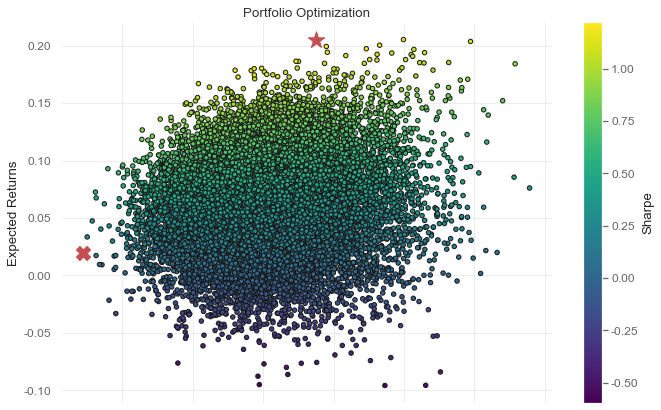

In [1591]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)  
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300) 
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)  
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

---
# 전략

## 1. 볼린저밴드와 MFI를 활용한 추세 추종 매매

추세 추종 : 상승 추세에 매수, 하락 추세에 매도
현금흐름지표 MFI나 일중강도 같은 거래량 관련 지표를 함께 활용

매수 : 주가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
매도 : 주가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

%b : 주가가 볼린저 밴드 어디에 위치하는지 
     (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)

MFI : 중심가격 TP (고가, 저가, 종가 합을 3으로 나눔) 
     TP * 거래량 = 현금흐름  --> 이것을 중심가격이 전일 대비 상승한 날은 '긍정적 현금흐름 합'
                                                   하락한 날은 '부정적 현금흐름 합'



## 2. 볼린저 밴드와 일중 강도를 활용한 반전 매매

### a.볼린저밴드

- 주가가 반점하는 지점을 찾아서 매수 또는 매도
- 매수 : 주가가 하단 밴드 부근에서 W(쌍바닥) 패턴을 나타내고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고, II% 가 0보다 크면 매수)
- 매도 : 주가가 상단 밴드 부근에서 주가 태그, 약세 지표가 확증 할 때 매수 (%b가 0.95보다 크고, II% 가 0보다 작으면 매수)

---
# Preprocessing 

## 0. Data

In [1668]:
df_2012=pd.read_excel('./datasets/예상회생기업.xlsx', index_col=0)
df_2012["거래소코드"] = df_2012["거래소코드"].map(padding)
df_2012 = df_2012[df_2012["회계년도"]==2018]
df_2012 = df_2012[["거래소코드"]]
df_2012

,거래소코드
104,138080
105,122690
106,072770
107,115160
108,060260
109,011210
110,038110
111,033530
112,019540
113,012860


In [1669]:
df_2012=pd.DataFrame(df_2012['거래소코드'].unique())
df_2012.rename(columns={0:'거래소코드'}, inplace=True)
df_2012

,거래소코드
0,138080
1,122690
2,072770
3,115160
4,060260
5,011210
6,038110
7,033530
8,019540
9,012860


## 1. volinger

> # 날짜 변경(2012년도데이터면 20130101~20140331)

In [1670]:
n=20
sigma = 2
df_invest=[]

for i in df_2012.index:
    df_market = stock.get_market_ohlcv("20190101", "20200101", df_2012.loc[i,"거래소코드"]) # 연도마다 날짜 설정
    df_market["거래소코드"] = df_2012.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_invest.append(df_market)

In [1671]:
df_invest = pd.concat(df_invest)
df_invest['PB'] = (df_invest['종가'] - df_invest['lb']) / (df_invest['ub'] - df_invest['lb'])
df_invest['PB'] = df_invest['PB'].fillna(0.5) # 상한선 하한선이 같아서 PB(바닥부터의 위치)를 중간인 0.5로 설정
df_invest

,시가,고가,저가,종가,거래량,거래대금,등락률,거래소코드,center,ub,lb,PB
날짜,,,,,,,,,,,,
2019-01-02,13569,14312,13178,13295,325868,5699317000,0.00,138080,NaN,NaN,NaN,0.500000
2019-01-03,13608,13999,13256,13490,283228,4929866750,1.47,138080,NaN,NaN,NaN,0.500000
2019-01-04,13490,14077,13334,13921,283114,4968080250,3.19,138080,NaN,NaN,NaN,0.500000
2019-01-07,14038,15367,13686,15250,697944,13166847950,9.55,138080,NaN,NaN,NaN,0.500000
2019-01-08,15015,15485,14703,15446,371514,7152487100,1.28,138080,NaN,NaN,NaN,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,4950,4960,4890,4940,29720,146674665,-0.20,200880,4851.25,5126.431758,4576.068242,0.661257
2019-12-24,4950,4950,4820,4830,21061,102140275,-2.23,200880,4842.75,5108.940968,4576.559032,0.476051
2019-12-26,4900,4915,4795,4890,28302,136977250,1.24,200880,4838.25,5097.627291,4578.872709,0.599758


## 2. MFI (Money Flow Index)

In [1672]:
df_invest.rename(columns={'고가':'high'},inplace = True)
df_invest.rename(columns={'저가':'low'},inplace = True)
df_invest.rename(columns={'종가':'close'},inplace = True)
df_invest.rename(columns={'거래량':'volume'},inplace = True)

In [1673]:
df_invest['TP'] = (df_invest['high'] + df_invest['low'] + df_invest['close']) / 3
df_invest["PMF"] = 0
df_invest["NMF"] = 0

In [1674]:
for i in range(len(df_invest.close)-1):
    if df_invest.TP.values[i] < df_invest.TP.values[i+1]:
        df_invest.PMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.NMF.values[i+1] = 0
    else:
        df_invest.NMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.PMF.values[i+1] = 0

In [1675]:
df_invest['MFR'] = (df_invest.PMF.rolling(window=10).sum() / df_invest.NMF.rolling(window=10).sum())
df_invest['MFR'] = df_invest['MFR'].fillna(0) # PMF, NMF가 0이면 NaN임(거래정지일 때)
df_invest['MFI10'] = 100 - 100/(1 + df_invest['MFR'])
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2019-01-02,13569,14312,13178,13295,325868,5699317000,0.00,138080,NaN,NaN,NaN,0.5,13595.000000,0,0,0.000000,0.000000
2019-01-03,13608,13999,13256,13490,283228,4929866750,1.47,138080,NaN,NaN,NaN,0.5,13581.666667,0,3846708286,0.000000,0.000000
2019-01-04,13490,14077,13334,13921,283114,4968080250,3.19,138080,NaN,NaN,NaN,0.5,13777.333333,3900555949,0,0.000000,0.000000
2019-01-07,14038,15367,13686,15250,697944,13166847950,9.55,138080,NaN,NaN,NaN,0.5,14767.666667,10307004344,0,0.000000,0.000000
2019-01-08,15015,15485,14703,15446,371514,7152487100,1.28,138080,NaN,NaN,NaN,0.5,15211.333333,5651223292,0,0.000000,0.000000
2019-01-09,15328,15367,14742,14937,335096,6384537500,-3.29,138080,NaN,NaN,NaN,0.5,15015.333333,0,5031578138,0.000000,0.000000
2019-01-10,14937,15211,14507,14859,238964,4552822250,-0.52,138080,NaN,NaN,NaN,0.5,14859.000000,0,3550766076,0.000000,0.000000
2019-01-11,15055,15915,14781,15055,451253,8765813600,1.32,138080,NaN,NaN,NaN,0.5,15250.333333,6881758667,0,0.000000,0.000000
2019-01-14,15133,15485,14859,15133,185060,3588999450,0.52,138080,NaN,NaN,NaN,0.5,15159.000000,0,2805324540,0.000000,0.000000


## 3. 일중 강도

In [1676]:
df_invest['II'] = (2*df_invest['close']-df_invest['high']-df_invest['low'])/(df_invest['high']-df_invest['low'])*df_invest['volume']
df_invest['II'] = df_invest['II'].fillna(0) # 상한가 또는 하한가일 때 가격이 고정되어서 분모, 분자가 0이된다.
df_invest['IIP21'] = df_invest['II'].rolling(window=21).sum()/df_invest['volume'].rolling(window=21).sum()*100
# df_invest = df_invest.dropna()
df_invest.head(20)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21
날짜,,,,,,,,,,,,,,,,,,,
2019-01-02,13569,14312,13178,13295,325868,5699317000,0.00,138080,NaN,NaN,NaN,0.500000,13595.000000,0,0,0.000000,0.000000,-258625.396825,NaN
2019-01-03,13608,13999,13256,13490,283228,4929866750,1.47,138080,NaN,NaN,NaN,0.500000,13581.666667,0,3846708286,0.000000,0.000000,-104828.667564,NaN
2019-01-04,13490,14077,13334,13921,283114,4968080250,3.19,138080,NaN,NaN,NaN,0.500000,13777.333333,3900555949,0,0.000000,0.000000,164228.982503,NaN
2019-01-07,14038,15367,13686,15250,697944,13166847950,9.55,138080,NaN,NaN,NaN,0.500000,14767.666667,10307004344,0,0.000000,0.000000,600788.202261,NaN
2019-01-08,15015,15485,14703,15446,371514,7152487100,1.28,138080,NaN,NaN,NaN,0.500000,15211.333333,5651223292,0,0.000000,0.000000,334457.616368,NaN
2019-01-09,15328,15367,14742,14937,335096,6384537500,-3.29,138080,NaN,NaN,NaN,0.500000,15015.333333,0,5031578138,0.000000,0.000000,-125996.096000,NaN
2019-01-10,14937,15211,14507,14859,238964,4552822250,-0.52,138080,NaN,NaN,NaN,0.500000,14859.000000,0,3550766076,0.000000,0.000000,0.000000,NaN
2019-01-11,15055,15915,14781,15055,451253,8765813600,1.32,138080,NaN,NaN,NaN,0.500000,15250.333333,6881758667,0,0.000000,0.000000,-233187.176367,NaN
2019-01-14,15133,15485,14859,15133,185060,3588999450,0.52,138080,NaN,NaN,NaN,0.500000,15159.000000,0,2805324540,0.000000,0.000000,-23058.594249,NaN


In [1677]:
# PB가 0.05 이하면서, IIP21이 0 이상이면 매수
# PB가 0.95 이하면서, IIP21이 0 이하이면 매수

# for i in range(0, len(df.close)):
#     if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
#     elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:

## 4. MACD

In [1678]:
macd_short, macd_long, macd_signal=12,26,9
df_invest["MACD_short"]=df_invest["close"].rolling(macd_short).mean()
df_invest["MACD_long"]=df_invest["close"].rolling(macd_long).mean()
df_invest["MACD"]=df_invest.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
df_invest["MACD_signal"]=df_invest["MACD"].rolling(macd_signal).mean()  
# df_invest["MACD_sign"]=df_invest.apply(lambda x: ("매수" if x["MACD"]>x["MACD_signal"] else "매도"), axis=1)
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal
날짜,,,,,,,,,,,,,,,,,,,,,
2019-01-02,13569,14312,13178,13295,325868,5699317000,0.00,138080,NaN,NaN,...,0,0,0.000000,0.000000,-258625.396825,NaN,NaN,NaN,NaN,NaN
2019-01-03,13608,13999,13256,13490,283228,4929866750,1.47,138080,NaN,NaN,...,0,3846708286,0.000000,0.000000,-104828.667564,NaN,NaN,NaN,NaN,NaN
2019-01-04,13490,14077,13334,13921,283114,4968080250,3.19,138080,NaN,NaN,...,3900555949,0,0.000000,0.000000,164228.982503,NaN,NaN,NaN,NaN,NaN
2019-01-07,14038,15367,13686,15250,697944,13166847950,9.55,138080,NaN,NaN,...,10307004344,0,0.000000,0.000000,600788.202261,NaN,NaN,NaN,NaN,NaN
2019-01-08,15015,15485,14703,15446,371514,7152487100,1.28,138080,NaN,NaN,...,5651223292,0,0.000000,0.000000,334457.616368,NaN,NaN,NaN,NaN,NaN
2019-01-09,15328,15367,14742,14937,335096,6384537500,-3.29,138080,NaN,NaN,...,0,5031578138,0.000000,0.000000,-125996.096000,NaN,NaN,NaN,NaN,NaN
2019-01-10,14937,15211,14507,14859,238964,4552822250,-0.52,138080,NaN,NaN,...,0,3550766076,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2019-01-11,15055,15915,14781,15055,451253,8765813600,1.32,138080,NaN,NaN,...,6881758667,0,0.000000,0.000000,-233187.176367,NaN,NaN,NaN,NaN,NaN
2019-01-14,15133,15485,14859,15133,185060,3588999450,0.52,138080,NaN,NaN,...,0,2805324540,0.000000,0.000000,-23058.594249,NaN,NaN,NaN,NaN,NaN


## 5. 이평선

In [1679]:
df_invest['MA9'] = df_invest['close'].rolling(9).mean()
df_invest['MA20'] = df_invest['close'].rolling(20).mean()
df_invest['MA40'] = df_invest['close'].rolling(40).mean()
df_invest['MA60'] = df_invest['close'].rolling(60).mean()

# pd.set_option('display.max_columns', None)
# df_invest.drop(columns='MACD_signal', inplace=True)
df_invest.reset_index(drop=False, inplace=True)
df_invest

,날짜,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
0,2019-01-02,13569,14312,13178,13295,325868,5699317000,0.00,138080,NaN,...,-258625.396825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,13608,13999,13256,13490,283228,4929866750,1.47,138080,NaN,...,-104828.667564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,13490,14077,13334,13921,283114,4968080250,3.19,138080,NaN,...,164228.982503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14038,15367,13686,15250,697944,13166847950,9.55,138080,NaN,...,600788.202261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,15015,15485,14703,15446,371514,7152487100,1.28,138080,NaN,...,334457.616368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,2019-12-23,4950,4960,4890,4940,29720,146674665,-0.20,200880,4851.25,...,12737.142857,-8.292178,4881.666667,4880.000000,1.666667,-179.131054,4926.666667,4851.25,5148.750,5418.166667
3194,2019-12-24,4950,4950,4820,4830,21061,102140275,-2.23,200880,4842.75,...,-17820.846154,-4.554061,4899.166667,4869.230769,29.935897,-141.260684,4916.111111,4842.75,5126.000,5390.333333
3195,2019-12-26,4900,4915,4795,4890,28302,136977250,1.24,200880,4838.25,...,16509.500000,-6.076459,4914.166667,4861.923077,52.243590,-103.087607,4907.777778,4838.25,5106.750,5362.666667
3196,2019-12-27,4860,4955,4860,4950,37395,183955325,1.23,200880,4838.50,...,33458.684211,-2.226412,4917.500000,4860.384615,57.115385,-66.987179,4910.000000,4838.50,5089.500,5335.333333


## 6. 마지막
> # 사용하는 날짜만 필터링(04/01~03/31)

In [1680]:
df_2012 = df_invest[df_invest['날짜'] >= '2019-04-01']
df_2012.set_index('날짜', inplace=True)
df_2012

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2019-04-01,19669,20138,19551,20021,103133,2624391750,0.99,138080,18298.10,22152.072163,...,62020.356048,21.821749,19603.500000,17794.769231,1808.730769,1060.391738,20237.777778,18298.10,17210.125,16483.800000
2019-04-02,20021,20099,19630,19786,96027,2426239500,-1.17,138080,18485.80,22239.429632,...,-32145.498934,20.606892,19860.916667,17933.115385,1927.801282,1249.002849,20177.000000,18485.80,17334.275,16591.983333
2019-04-03,19864,19981,19590,19864,95224,2402546950,0.40,138080,18644.15,22346.905121,...,38235.723785,21.150454,20066.166667,18057.923077,2008.243590,1420.173789,20111.777778,18644.15,17470.150,16698.216667
2019-04-04,20099,21194,18300,18730,949657,23567073850,-5.71,138080,18732.10,22350.113814,...,-667450.704216,5.312383,20043.333333,18155.653846,1887.679487,1555.112536,19903.222222,18732.10,17580.600,16778.366667
2019-04-05,19473,22210,18926,20724,1695132,44726515600,10.65,138080,18960.85,22468.025878,...,161047.863581,5.363799,20075.916667,18334.615385,1741.301282,1652.265670,19907.555556,18960.85,17722.325,16869.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,4950,4960,4890,4940,29720,146674665,-0.20,200880,4851.25,5126.431758,...,12737.142857,-8.292178,4881.666667,4880.000000,1.666667,-179.131054,4926.666667,4851.25,5148.750,5418.166667
2019-12-24,4950,4950,4820,4830,21061,102140275,-2.23,200880,4842.75,5108.940968,...,-17820.846154,-4.554061,4899.166667,4869.230769,29.935897,-141.260684,4916.111111,4842.75,5126.000,5390.333333
2019-12-26,4900,4915,4795,4890,28302,136977250,1.24,200880,4838.25,5097.627291,...,16509.500000,-6.076459,4914.166667,4861.923077,52.243590,-103.087607,4907.777778,4838.25,5106.750,5362.666667


In [1681]:
# df_2012[df_2012.isna().any(axis=1)]
df_2012.isna().sum()

시가             0
high           0
low            0
close          0
volume         0
거래대금           0
등락률            0
거래소코드          0
center         0
ub             0
lb             0
PB             0
TP             0
PMF            0
NMF            0
MFR            0
MFI10          0
II             0
IIP21          0
MACD_short     0
MACD_long      0
MACD           0
MACD_signal    0
MA9            0
MA20           0
MA40           0
MA60           0
dtype: int64

---
# 전략1 : Buy&Hold 전략

## 2) 포트폴리오 일별 수익률 계산(비중 3개 중 택 1)

In [1682]:
df_port = df_2012.copy()
df_port

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2019-04-01,19669,20138,19551,20021,103133,2624391750,0.99,138080,18298.10,22152.072163,...,62020.356048,21.821749,19603.500000,17794.769231,1808.730769,1060.391738,20237.777778,18298.10,17210.125,16483.800000
2019-04-02,20021,20099,19630,19786,96027,2426239500,-1.17,138080,18485.80,22239.429632,...,-32145.498934,20.606892,19860.916667,17933.115385,1927.801282,1249.002849,20177.000000,18485.80,17334.275,16591.983333
2019-04-03,19864,19981,19590,19864,95224,2402546950,0.40,138080,18644.15,22346.905121,...,38235.723785,21.150454,20066.166667,18057.923077,2008.243590,1420.173789,20111.777778,18644.15,17470.150,16698.216667
2019-04-04,20099,21194,18300,18730,949657,23567073850,-5.71,138080,18732.10,22350.113814,...,-667450.704216,5.312383,20043.333333,18155.653846,1887.679487,1555.112536,19903.222222,18732.10,17580.600,16778.366667
2019-04-05,19473,22210,18926,20724,1695132,44726515600,10.65,138080,18960.85,22468.025878,...,161047.863581,5.363799,20075.916667,18334.615385,1741.301282,1652.265670,19907.555556,18960.85,17722.325,16869.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,4950,4960,4890,4940,29720,146674665,-0.20,200880,4851.25,5126.431758,...,12737.142857,-8.292178,4881.666667,4880.000000,1.666667,-179.131054,4926.666667,4851.25,5148.750,5418.166667
2019-12-24,4950,4950,4820,4830,21061,102140275,-2.23,200880,4842.75,5108.940968,...,-17820.846154,-4.554061,4899.166667,4869.230769,29.935897,-141.260684,4916.111111,4842.75,5126.000,5390.333333
2019-12-26,4900,4915,4795,4890,28302,136977250,1.24,200880,4838.25,5097.627291,...,16509.500000,-6.076459,4914.166667,4861.923077,52.243590,-103.087607,4907.777778,4838.25,5106.750,5362.666667


### 1. 동등비중

In [1683]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change() # 전략없이 일평균으로만
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1684]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1685]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2019-04-01
End Period          2019-12-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   6.74%
CAGR﹪              9.11%

Sharpe              0.49
Prob. Sharpe Ratio  66.21%
Sortino             0.68
Sortino/√2          0.48
Omega               1.09

Max Drawdown        -17.12%
Longest DD Days     194

Gain/Pain Ratio     0.09
Gain/Pain (1M)      0.46

Payoff Ratio        1.0
Profit Factor       1.09
Common Sense Ratio  1.18
CPC Index           0.57
Tail Ratio          1.08
Outlier Win Ratio   3.45
Outlier Loss Ratio  3.57

MTD                 2.02%
3M                  -6.32%
6M                  -7.87%
YTD                 6.74%
1Y                  6.74%
3Y (ann.)           9.11%
5Y (ann.)           9.11%
10Y (ann.)          9.11%
All-time (ann.)     9.11%

Avg. Drawdown       -4.19%
Avg. Drawdown Days  41
Recovery Factor     0.39
Ulcer Index         0.07
Serenity Index      0.11


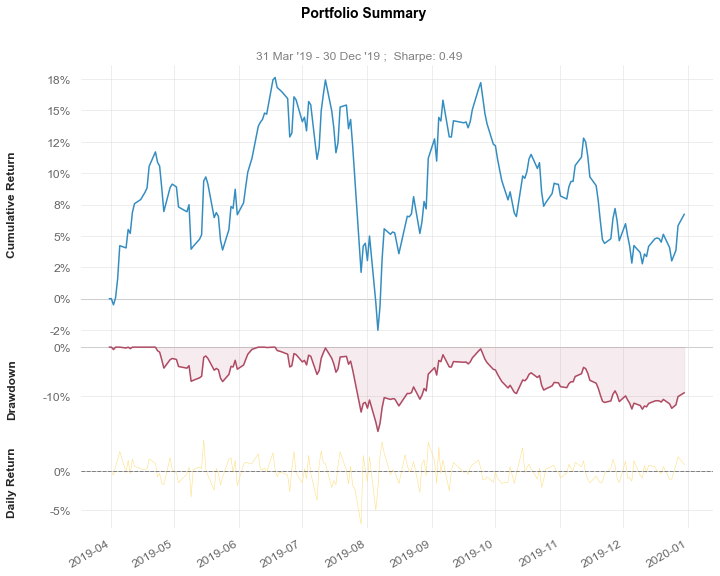

In [1686]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략2 : PB&MFI 전략

## 1) 전략2 함수 : 일별수익률로 return

In [1507]:
def func_strategy2(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] >= 0.7)&(df_func.loc[i, "MFI10"] >= 70)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if (df_func.loc[i, "PB"] >= 0.7)&(df_func.loc[i, "MFI10"] >= 70):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] <= 0.6): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock

## 2) 포트폴리오 일별 수익률 계산

In [1508]:
df_port = df_2012.copy()

### 1. 동등비중

In [1509]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy2(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 2. 수익률 높게

In [1510]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock * dict_weight_max[i]
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1511]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   27.1%
CAGR﹪              27.18%

Sharpe              5.85
Prob. Sharpe Ratio  100.0%
Sortino             11.64
Sortino/√2          8.23
Omega               2.65

Max Drawdown        -1.48%
Longest DD Days     83

Gain/Pain Ratio     1.65
Gain/Pain (1M)      49.57

Payoff Ratio        1.56
Profit Factor       2.65
Common Sense Ratio  4.77
CPC Index           2.6
Tail Ratio          1.8
Outlier Win Ratio   2.89
Outlier Loss Ratio  3.37

MTD                 2.98%
3M                  8.5%
6M                  8.48%
YTD                 8.5%
1Y                  27.1%
3Y (ann.)           27.18%
5Y (ann.)           27.18%
10Y (ann.)          27.18%
All-time (ann.)     27.18%

Avg. Drawdown       -0.31%
Avg. Drawdown Days  6
Recovery Factor     18.35
Ulcer Index         0.01
Serenity Index      12.68


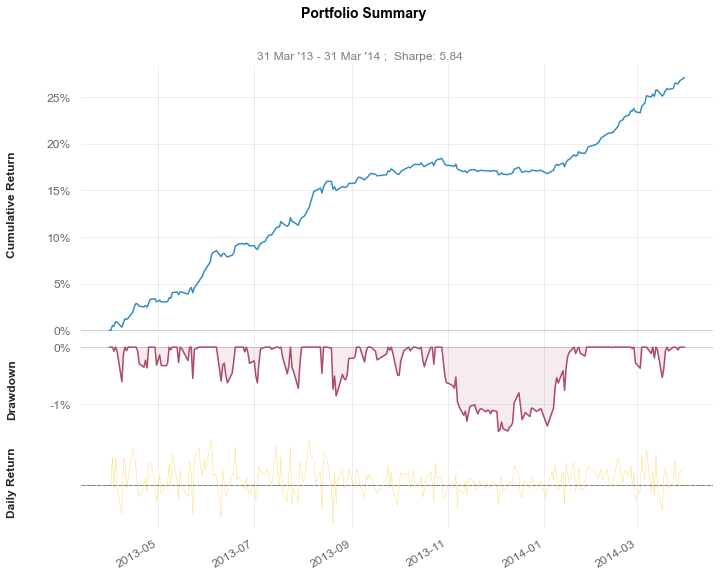

In [1512]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

## 함수 만들기(안씀)

In [1513]:
# df_test = df_PB[df_PB["거래소코드"]=="023430"]
# df_test["BS"] = ""
# df_test["보유날_종가"] = 0
# df_test["보유날_일별수익률"] = 0
# df_test["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
# df_test

In [1514]:
# from datetime import timedelta 
# df_tm2 = pd.DataFrame(df_test.iloc[0]).T
# df_tm2["날짜"]=(df_test.index[0] - timedelta(days=2))
# df_tm2["BS"] = "sell" 
# df_tm2.set_index("날짜", inplace=True)
# df_tm2

# df_tm1 = pd.DataFrame(df_test.iloc[0]).T
# df_tm1["날짜"]=(df_test.index[0] - timedelta(days=1))
# df_tm1["BS"] = "sell"
# df_tm1.set_index("날짜", inplace=True)
# df_tm1

# df_test = pd.concat([df_tm2, df_tm1, df_test], axis=0)
# df_test.reset_index(drop=False, inplace=True)
# df_test

1. BS 컬럼

In [1515]:
# for i in df_test.index:
#     if (i == df_test.index[0])|(i == df_test.index[1]):
#         continue
    
#     if df_test.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
#         if (df_test.loc[i-2, "BS"] == "buy")&(df_test.loc[i-1, "BS"] == "sell")&((df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80)):
#             df_test.loc[i-1, "BS"] = "buy"
#             df_test.loc[i, "첫매수날_여부"] = 1
        
#         if (df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80):
#             df_test.loc[i, "BS"] = "buy"
#         else:
#             df_test.loc[i, "BS"] = "sell"
    
#     else: # 전날이 "buy"일 때
#         if (df_test.loc[i, "PB"] <= 0.5): # 매도사인
#             df_test.loc[i, "BS"] = "sell"
#         else:
#             df_test.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"


In [1516]:
# df_test

2. 보유날 종가 컬럼 생성

In [1517]:
# for i in df_test.index:
#     if df_test.loc[i, "BS"] == "buy":
#         df_test.loc[i, "보유날_종가"] = df_test.loc[i, "close"]

In [1518]:
# df_test

In [1519]:
# list(df_test["보유날_종가"])

3. 보유날 일별 수익률 컬럼 생성

In [1520]:
# df_test["보유날_일별수익률"] = df_test["보유날_종가"].pct_change()
# df_test["보유날_일별수익률"] = df_test["보유날_일별수익률"].fillna(0)
# for i in df_test.index:
#     if df_test.loc[i, "보유날_일별수익률"] == -1.0:
#         df_test.loc[i, "보유날_일별수익률"] = 0
#     if df_test.loc[i, "보유날_일별수익률"] == np.inf:
#         df_test.loc[i, "보유날_일별수익률"] = 0

In [1521]:
# list(df_test["보유날_일별수익률"])

4. 첫 매수날 일별 수익률을 0으로

In [1522]:
# for i in df_test.index:
#     if (i == df_test.index[0])|(i == df_test.index[1]):
#         continue
    
#     if (df_test.loc[i-1, "BS"] == "sell")&(df_test.loc[i, "BS"] == "buy"):
#         df_test.loc[i, "첫매수날_여부"] = 1

In [1523]:
# for i in df_test.index:
#     if df_test.loc[i, "첫매수날_여부"] == 1:
#         df_test.loc[i, "보유날_일별수익률"] = 0

In [1524]:
# df_test.drop(index=[0,1],inplace=True)
# df_test.reset_index(drop=True, inplace=True)
# df_stock = df_test.set_index("날짜")["보유날_일별수익률"]
# df_stock

plot

In [1525]:
# import quantstats as qs
# qs.reports.metrics(df_stock, mode = 'basic')

In [1526]:
# qs.plots.snapshot(df_stock)

---
# 전략3

## 1) 전략3 함수 : 일별수익률로 return

In [1527]:
def func_strategy3(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] <= 0.2)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "PB"] <= 0.2)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "IIP21"] <= 0): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1528]:
df_port = df_2012.copy()

### 1. 동등비중

In [1529]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy3(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 2. 수익률 높게

In [1530]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock * dict_weight_max[i]
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1531]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   3.82%
CAGR﹪              3.83%

Sharpe              0.52
Prob. Sharpe Ratio  69.32%
Sortino             0.71
Sortino/√2          0.5
Omega               1.1

Max Drawdown        -8.6%
Longest DD Days     305

Gain/Pain Ratio     0.1
Gain/Pain (1M)      0.57

Payoff Ratio        0.95
Profit Factor       1.1
Common Sense Ratio  1.17
CPC Index           0.56
Tail Ratio          1.07
Outlier Win Ratio   3.62
Outlier Loss Ratio  3.81

MTD                 1.37%
3M                  3.86%
6M                  0.74%
YTD                 3.86%
1Y                  3.82%
3Y (ann.)           3.83%
5Y (ann.)           3.83%
10Y (ann.)          3.83%
All-time (ann.)     3.83%

Avg. Drawdown       -1.84%
Avg. Drawdown Days  57
Recovery Factor     0.44
Ulcer Index         0.04
Serenity Index      0.08


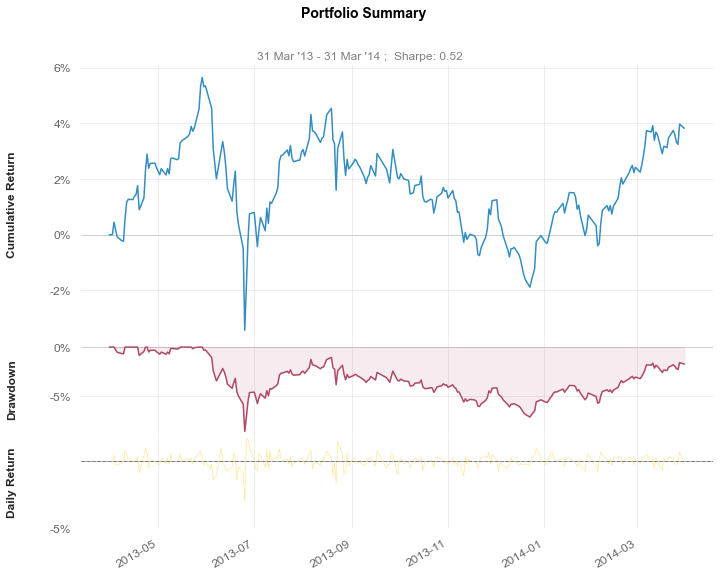

In [1532]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략4

## 1) 전략4 함수 : 일별수익률로 return

In [1533]:
def func_strategy4(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if ((df_func.loc[i, "MACD"] <= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] <= df_func.loc[i, "MA20"])): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1534]:
df_port = df_2012.copy()

### 1. 동등비중

In [1535]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy4(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

### 2. 수익률 높게

In [1536]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1537]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   13.93%
CAGR﹪              13.97%

Sharpe              2.37
Prob. Sharpe Ratio  98.7%
Sortino             3.5
Sortino/√2          2.47
Omega               1.51

Max Drawdown        -4.06%
Longest DD Days     190

Gain/Pain Ratio     0.51
Gain/Pain (1M)      5.72

Payoff Ratio        1.03
Profit Factor       1.51
Common Sense Ratio  1.8
CPC Index           0.93
Tail Ratio          1.19
Outlier Win Ratio   3.3
Outlier Loss Ratio  4.08

MTD                 2.62%
3M                  6.91%
6M                  3.41%
YTD                 6.91%
1Y                  13.93%
3Y (ann.)           13.97%
5Y (ann.)           13.97%
10Y (ann.)          13.97%
All-time (ann.)     13.97%

Avg. Drawdown       -0.83%
Avg. Drawdown Days  20
Recovery Factor     3.43
Ulcer Index         0.02
Serenity Index      0.8


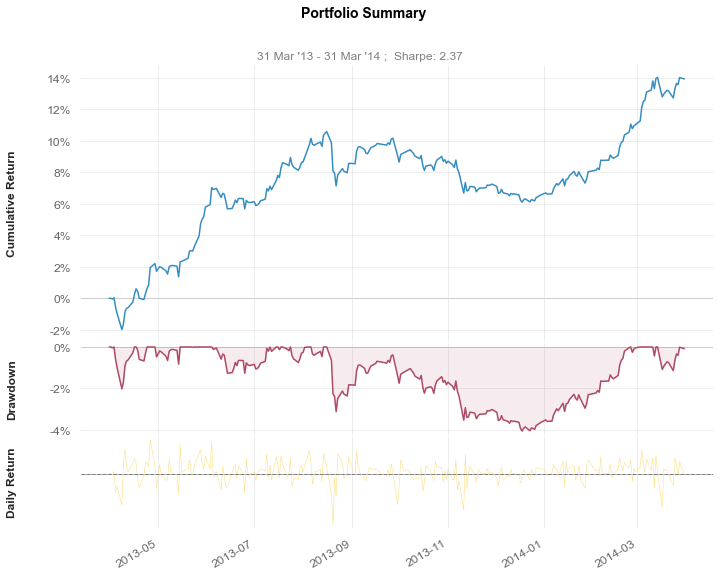

In [1538]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략5

## 1) 전략5 함수 : 일별수익률로 return

In [1539]:
def func_strategy5(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])): # 매수사인(위 if문에도 넣기)
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "close"] <= df_func.loc[i, "MA40"]): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1540]:
df_port = df_2012.copy()

### 1. 동등비중

In [1541]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy5(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 2. 수익률 높게

In [1542]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1543]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2013-04-01
End Period          2014-03-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   30.66%
CAGR﹪              30.76%

Sharpe              4.35
Prob. Sharpe Ratio  100.0%
Sortino             7.26
Sortino/√2          5.13
Omega               2.15

Max Drawdown        -2.63%
Longest DD Days     74

Gain/Pain Ratio     1.15
Gain/Pain (1M)      62.01

Payoff Ratio        1.29
Profit Factor       2.15
Common Sense Ratio  3.11
CPC Index           1.73
Tail Ratio          1.44
Outlier Win Ratio   3.64
Outlier Loss Ratio  4.38

MTD                 5.64%
3M                  11.58%
6M                  11.88%
YTD                 11.58%
1Y                  30.66%
3Y (ann.)           30.76%
5Y (ann.)           30.76%
10Y (ann.)          30.76%
All-time (ann.)     30.76%

Avg. Drawdown       -0.64%
Avg. Drawdown Days  10
Recovery Factor     11.66
Ulcer Index         0.01
Serenity Index      

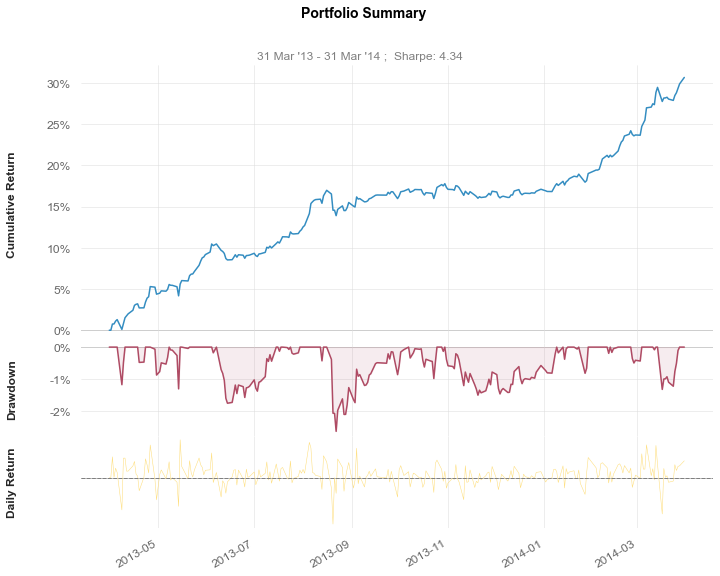

In [1544]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)